<a href="https://colab.research.google.com/github/abosalah0/Codveda-Technology/blob/main/Intermediate_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (150, 5)
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


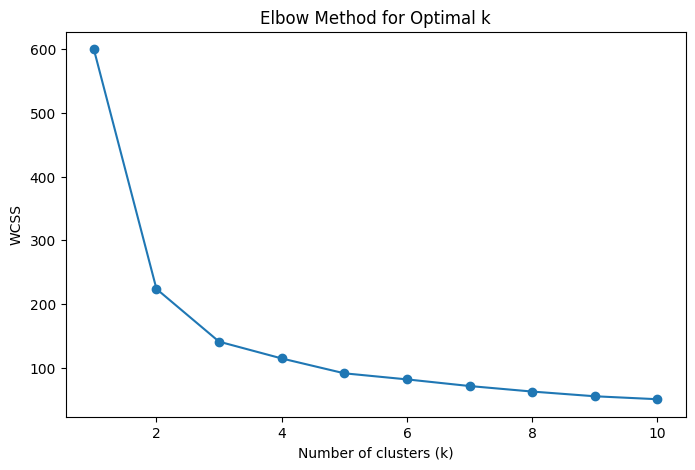

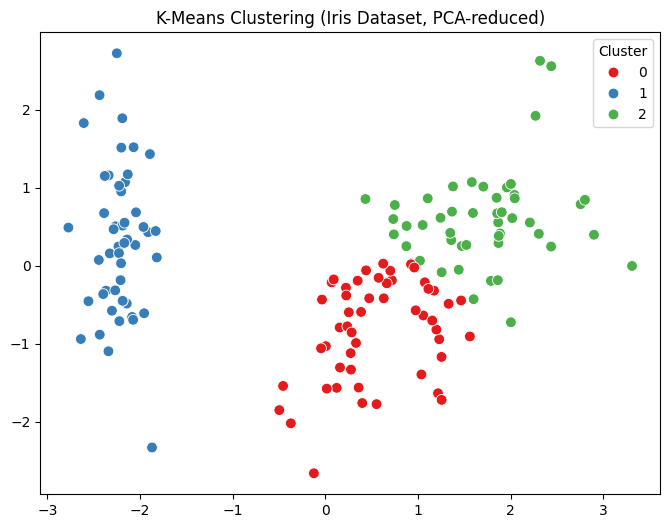


Cluster centers (scaled feature space):
[[-0.05021989 -0.88029181  0.34753171  0.28206327]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.13597027  0.09659843  0.996271    1.01717187]]


In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 2: Load the dataset
df = pd.read_csv("/content/1) iris.csv")

print("Shape:", df.shape)
print(df.head())

# Step 3: Extract features only (drop species if present)
if 'species' in df.columns:
    X = df.drop(columns=['species'])
else:
    X = df

# Step 4: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Determine optimal number of clusters (Elbow method)
wcss = []  # within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()

# Step 6: Train KMeans with chosen k (let’s try k=3, since Iris has 3 species)
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Step 7: Add cluster labels to dataframe
df['Cluster'] = clusters

# Step 8: Reduce to 2D for visualization (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette="Set1", s=60)
plt.title("K-Means Clustering (Iris Dataset, PCA-reduced)")
plt.show()

# Step 9: Inspect cluster centers
print("\nCluster centers (scaled feature space):")
print(kmeans.cluster_centers_)


## 📝 Task 3 (Level 2): K-Means Clustering — Summary

**Steps performed:**
1. Loaded the Iris dataset and selected only numeric features.  
2. Scaled the features using `StandardScaler`.  
3. Used the **Elbow method** to determine the optimal number of clusters (k ≈ 3).  
4. Applied **K-Means clustering** with k=3.  
5. Reduced dimensions to 2D using **PCA** for visualization.  
6. Visualized clusters with a scatter plot.  

**Findings:**
- The Elbow curve showed that **k=3** is a good choice.  
- The clustering roughly corresponds to the 3 actual species in the Iris dataset.  
- The clusters are well-separated in the PCA-reduced space, confirming that K-Means found meaningful groupings.  


